# Warren Truss Calculation
# By Frinze
### Import Modules and Dimension Definitions

In [1]:
from matplotlib.pyplot import cm
import numpy as np
import matplotlib.pyplot as plt
COMP_ROUND = 10
OUT_ROUND = 2

# Dimensions
X_LENGTH = 10
Y_LENGTH = 10
ANGLE = np.radians(45)

# Define CONSTANTS
F_DL = 20
X_DL = 3 * X_LENGTH
X_LL = 4 * X_LENGTH
# F_EL


def drawLine(m, c, header, color):  # y = mx + c
    x = np.arange(0, 100, 0.1)
    y = m * x + c
    plt.plot(x, y, label=header+" - y= "+str(np.round(m, OUT_ROUND)
                                             )+"x + "+str(np.round(c, OUT_ROUND)), c=color)
    plt.annotate(header, xy=(99, y[99*10-1]), xytext=(30, 0), color=color,
                 textcoords="offset points",
                 size=14, va="center")
    plt.xlim([0, 100])
    plt.ylim([-220, 220])
    plt.legend(loc="upper left", bbox_to_anchor=(0, 1))

    # plt.savefig(header + ".png")


def drawEachMember(memberNames, members, Fmax):
    plt.figure(figsize=(20, 10))
    plt.title("Forces of each Member")
    plt.ylabel("Force Experience (N)")
    plt.xlabel("Live Load (N)")
    plt.grid(True, which="both")

    color = iter(cm.rainbow(np.linspace(0, 1, len(memberNames))))
    for i in range(len(memberNames)):
        c = next(color)
        drawLine(members[i][0], members[i][1], memberNames[i], c)

    drawLine(0, Fmax, "BREAKING POINT", 'w')
    drawLine(0, -Fmax, "BREAKING POINT", 'w')

    # Simulation of First Break
    current = members[:, 1]
    break_x_val = 0
    MULTI_INCREMENT = 0.1
    print(members)
    print(members[:, 1])
    while (True):  # Do while
        current += MULTI_INCREMENT * members[:, 0]
        break_x_val += MULTI_INCREMENT
        breakage = np.where(abs(current) >= Fmax)[0]
        if (len(breakage) != 0):
            break

    break_y_val = members[breakage[0]][1]

    plt.annotate("First Break at \n (" + str(np.round(break_x_val, 2)) + ", "+str(np.round(break_y_val, 2))+")", (break_x_val,
                                                                                                                  break_y_val), xytext=(50, 50), textcoords='offset points', arrowprops=dict(facecolor='white', shrink=0.05))
    # FIND INTERSECTION
    plt.savefig("a.png")
    plt.show()



### Calculation Results

In [2]:
# Definition of Members and Forces [m,c]
RI = np.array([X_LL, F_DL * X_DL]) / (X_LENGTH*8)

RA = np.array([1, F_DL])
RA = RA - RI

print("RA", RA)
print("RI", RI)

# Tensile Strength 70 MPa * 2 mm^2
Fmax = 140


# Member Definition
AJ = -RA / np.sin(ANGLE)
AB = RA

BJ = np.zeros((2))
BC = RA

JC = RA / np.sin(ANGLE)
JK = -2*RA

KC = np.zeros((2))
KL = -2 * RA

CL = -RA / np.sin(ANGLE)
CD = 3 * RA

DL = np.array([0.0, 20.0])
DE = 3 * RA

LE = (RA - np.array([0.0, 20.0])) / np.sin(ANGLE)
LM = -4 * RA + np.array([0.0, 20.0])

ME = np.zeros((2))
MN = -4 * RA + np.array([0.0, 20.0])

EN = (-RA + np.array([0.0, 20.0])) / np.sin(ANGLE)
EF = 5 * RA - np.array([1.0, 40.0])

FN = np.zeros((2))
FG = 5 * RA - np.array([1.0, 40.0])

NG = (RA - np.array([1, 20.0])) / np.sin(ANGLE)
NO = -6 * RA + np.array([2.0, 60.0])

OG = np.zeros((2))
OP = -6 * RA + np.array([2.0, 60.0])

GP = (-RA + np.array([1.0, 20.0])) / np.sin(ANGLE)
GH = 7 * RA - np.array([3.0, 80.0])

HP = np.zeros((2))
HI = 7 * RA - np.array([3.0, 80.0])

PI = (RA - np.array([1, 20.0])) / np.sin(ANGLE)
calc = (-RA + np.array([1, DL]))
print("CALC", calc)

RA [ 0.5 12.5]
RI [0.5 7.5]
CALC [0.5 array([-12.5,   7.5])]


### Graphing

('AJ', array([ -0.70710678, -17.67766953]))
('AB', array([ 0.5, 12.5]))
('BJ', array([0., 0.]))
('BC', array([ 0.5, 12.5]))
('JC', array([ 0.70710678, 17.67766953]))
('JK', array([ -1., -25.]))
('KC', array([0., 0.]))
('KL', array([ -1., -25.]))
('CL', array([ -0.70710678, -17.67766953]))
('CD', array([ 1.5, 37.5]))
('DL', array([ 0., 20.]))
('DE', array([ 1.5, 37.5]))
('LE', array([  0.70710678, -10.60660172]))
('LM', array([ -2., -30.]))
('ME', array([0., 0.]))
('MN', array([ -2., -30.]))
('EN', array([-0.70710678, 10.60660172]))
('FN', array([0., 0.]))
('FG', array([ 1.5, 22.5]))
('NG', array([ -0.70710678, -10.60660172]))
('NO', array([ -1., -15.]))
('OG', array([0., 0.]))
('OP', array([ -1., -15.]))
('GP', array([ 0.70710678, 10.60660172]))
('GH', array([0.5, 7.5]))
('HP', array([0., 0.]))
('HI', array([0.5, 7.5]))
('PI', array([ -0.70710678, -10.60660172]))
SUM OF MEMBERS -13.698484809834987
[[ -2.         -30.        ]
 [ -1.         -25.        ]
 [ -1.         -15.        ]
 [

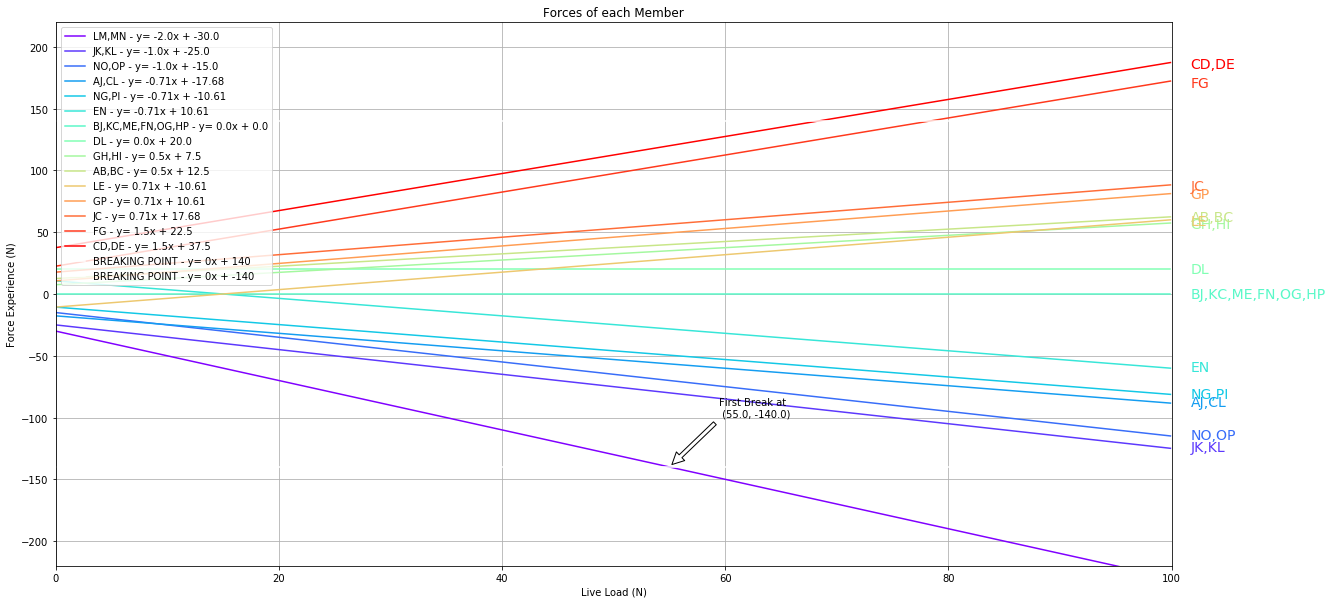

In [3]:
memberNames = np.array(["AJ", 'AB', 'BJ', 'BC', 'JC', 'JK', 'KC', 'KL', 'CL', 'CD', 'DL', 'DE', 'LE',
                        'LM', 'ME', 'MN', 'EN', 'FN', 'FG', 'NG', 'NO', 'OG', 'OP', 'GP', 'GH', 'HP', 'HI', 'PI'])
members = np.array([AJ, AB, BJ, BC, JC, JK, KC, KL, CL, CD, DL, DE, LE,
                    LM, ME, MN, EN, FN, FG, NG, NO, OG, OP, GP, GH, HP, HI, PI])
for i in zip(memberNames, members):
    print(i)
print("SUM OF MEMBERS", members.sum())
uniqueMembers, index, dup_correspond_index = np.unique(
    members, axis=0, return_index=True, return_inverse=True)

uniqueMemberNames = list(memberNames[index])

for i, j in enumerate(dup_correspond_index):  # Append Non-Unique to Existing
    if(uniqueMemberNames[j] != memberNames[i]):
        uniqueMemberNames[j] += "," + memberNames[i]

drawEachMember(uniqueMemberNames, members[index], Fmax)